<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/gaia_wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#--quiet is to show less information (Warinings, errors, and so on) when installing
#--pre is to install the pre-releases
!pip install --pre  --quiet astroquery

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from astroquery.xmatch import XMatch
from astropy.coordinates import SkyCoord
from astropy import units as u

Could not import regions, which is required for some of the functionalities of this module.


In [0]:
#Cotten Data
#Cotten After matching prime data
df_excess = pd.read_csv('https://github.com/suafle/useful_data/raw/master/Catalogs/Cotten_prime.csv')
df_excess = df_excess.dropna(subset=['Jmag'])

ra1 = df_excess['RAJ2000']
dec1 = df_excess['DEJ2000']
j_e = df_excess['Jmag']
h_e = df_excess['Hmag']
k_e = df_excess['Kmag']
w1_e = df_excess['W1mag']
w2_e = df_excess['W2mag']
w3_e = df_excess['W3mag']
w4_e = df_excess['W4mag']

In [0]:
#Reading data Xmatch
df_xmatch = pd.read_csv('https://github.com/suafle/useful_data/raw/master/Catalogs/xmatch_gaia_cotten.csv')

ra2 = df_xmatch['ra']
dec2 = df_xmatch['dec']

In [0]:
#matching
c = SkyCoord(ra=ra1*u.deg,dec=dec1*u.deg)
catalog = SkyCoord(ra=ra2*u.deg,dec=dec2*u.deg)
idx, d2d, d3d = c.match_to_catalog_sky(catalog) #idx contains the index of the matching

In [0]:
#print(df_xmatch.columns)
plx = df_xmatch['parallax'][idx]
plx.iloc[345] = 	7.9601 #I fixed this by hand by checking alladin
dist = 1./plx * 1000 #Dist in pc
mu = 5*np.log10(dist) - 5

In [0]:
J_e = j_e - mu
H_e = h_e - mu
K_e = k_e - mu
W1_e = w1_e - mu
W2_e = w2_e - mu
W3_e = w3_e - mu
W4_e = w4_e - mu

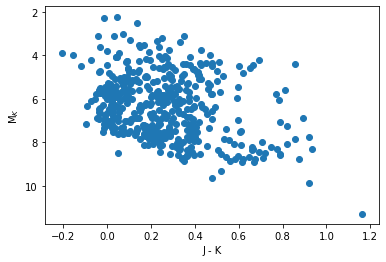

In [21]:
plt.scatter(j_e-k_e,k_e)
plt.xlabel('J - K')
plt.ylabel(r'M$_K$')
plt.gca().invert_yaxis()
plt.show()
plt.close()